In [ ]:
import pandas as pd

df = pd.read_csv('tennis.csv')

df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
from sklearn.preprocessing import LabelEncoder as LE

le = LE()

In [ ]:
len(df.loc[0, :])

5

In [ ]:
df.columns[0]

'outlook'

In [ ]:
for i in range(len(df.loc[0, :])):
    df[df.columns[i]] = le.fit_transform(df[df.columns[i]])
    
df

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [ ]:
X = df.loc[:, 'outlook':'windy']

y = df.loc[:, 'play']

y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
Name: play, dtype: int32

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DC

dc = DC()

dc.fit(X, y)

DecisionTreeClassifier()

In [ ]:
y_pred = dc.predict(X)

y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dc, X, y,
                target_name="role",
                feature_names=df.play,
                class_names=list(df.play))

viz

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(dc, 
#                    feature_names=df.play.values,  
#                    class_names=df.play.values,
#                    filled=True)

[Text(186.0, 195.696, 'X[0] <= 1.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(111.60000000000001, 152.208, 'X[1] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(74.4, 108.72, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(37.2, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 65.232, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(74.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(148.8, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(260.40000000000003, 152.208, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(223.20000000000002, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(297.6, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

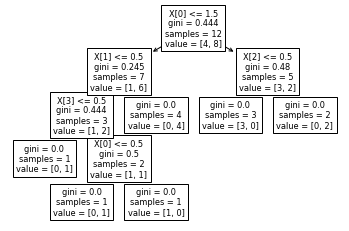

In [ ]:
tree.plot_tree(dc) 